In [1]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

In [11]:
data = np.array([
    [1, 40, 0],
    [2, 50, 0],
    [3, 55, 0],
    [4, 60, 0],
    [5, 65, 1],
    [6, 70, 1],
    [7, 75, 1],
    [8, 80, 1],
    [9, 85, 1],
    [10, 90, 1],
    [1, 30, 0],
    [2, 35, 0],
    [3, 40, 0],
    [4, 45, 0],
    [5, 50, 0],
    [6, 55, 1],
    [7, 60, 1],
    [8, 65, 1],
    [9, 70, 1],
    [10, 75, 1],
    [2, 45, 0],
    [3, 48, 0],
    [4, 52, 0],
    [5, 60, 1],
    [6, 62, 1],
    [7, 68, 1],
    [8, 74, 1],
    [9, 80, 1],
    [10, 85, 1],
    [5, 55, 1],
    [6, 60, 1],
    [7, 65, 1],
    [8, 70, 1],
    [9, 75, 1],
    [10, 80, 1],
    [2, 40, 0],
    [3, 45, 0],
    [4, 50, 0],
    [5, 55, 1],
    [6, 60, 1],
    [7, 65, 1],
    [8, 70, 1],
    [9, 75, 1],
    [10, 80, 1]
])


In [12]:
X = data[:, :2] 
y = data[:, 2]

In [30]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [31]:
model = LogisticRegression()
model.fit(X_train, y_train)

LogisticRegression()

In [32]:
y_pred = model.predict(X_test)

In [33]:
for i in range(len(X_test)):
    print(f"Hours Studies: {X_test[i][0]}, Attendance: {X_test[i][1]}, Pass: {True if (y_test[i]) else False}")

Hours Studies: 4, Attendance: 50, Pass: False
Hours Studies: 6, Attendance: 62, Pass: True
Hours Studies: 7, Attendance: 68, Pass: True
Hours Studies: 3, Attendance: 45, Pass: False
Hours Studies: 10, Attendance: 80, Pass: True
Hours Studies: 7, Attendance: 65, Pass: True
Hours Studies: 5, Attendance: 65, Pass: True
Hours Studies: 3, Attendance: 40, Pass: False
Hours Studies: 9, Attendance: 85, Pass: True


In [34]:
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy:.2f}")

Accuracy: 1.00


In [35]:
print("\nConfusion Matrix:")
print(confusion_matrix(y_test, y_pred))

print("\nClassification Report:")
print(classification_report(y_test, y_pred))


Confusion Matrix:
[[3 0]
 [0 6]]

Classification Report:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00         3
           1       1.00      1.00      1.00         6

    accuracy                           1.00         9
   macro avg       1.00      1.00      1.00         9
weighted avg       1.00      1.00      1.00         9



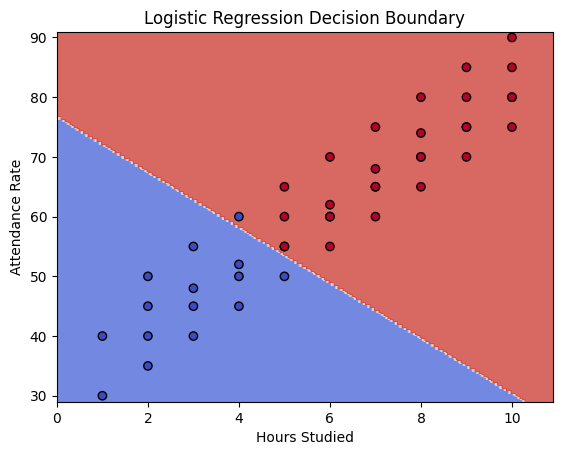

In [36]:
def plot_decision_boundary(model, X, y):
    x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
    y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
    xx, yy = np.meshgrid(np.arange(x_min, x_max, 0.1),
                         np.arange(y_min, y_max, 0.1))
    Z = model.predict(np.c_[xx.ravel(), yy.ravel()])
    Z = Z.reshape(xx.shape)
    plt.contourf(xx, yy, Z, alpha=0.8, cmap=plt.cm.coolwarm)
    plt.scatter(X[:, 0], X[:, 1], c=y, edgecolor='k', cmap=plt.cm.coolwarm)
    plt.xlabel('Hours Studied')
    plt.ylabel('Attendance Rate')
    plt.title('Logistic Regression Decision Boundary')
    plt.show()

plot_decision_boundary(model, X, y)

### New Practice [Will a customer convert]

In [40]:
import pandas as pd
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
from sklearn.metrics import classification_report
from imblearn.over_sampling import SMOTE

In [41]:
df = pd.read_csv("sales_conversion_dataset.csv")
df.head()

,Marketing_Spend,Customer_Age,Website_Interaction_Time,Page_Views,Email_Clicks,Region,Outcome
0,1935.246582,64,7.394506,38,4,East,0
1,4758.500101,29,16.430351,17,9,West,1
2,3686.770315,33,26.462333,23,0,South,1
3,3033.426573,41,19.700882,24,2,North,1
4,864.491338,36,16.222255,8,6,East,1


In [42]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 7 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Marketing_Spend           1000 non-null   float64
 1   Customer_Age              1000 non-null   int64  
 2   Website_Interaction_Time  1000 non-null   float64
 3   Page_Views                1000 non-null   int64  
 4   Email_Clicks              1000 non-null   int64  
 5   Region                    1000 non-null   object 
 6   Outcome                   1000 non-null   int64  
dtypes: float64(2), int64(4), object(1)
memory usage: 54.8+ KB


In [43]:
df = pd.get_dummies(df, columns=["Region"], drop_first=True)
df.head()

,Marketing_Spend,Customer_Age,Website_Interaction_Time,Page_Views,Email_Clicks,Outcome,Region_North,Region_South,Region_West
0,1935.246582,64,7.394506,38,4,0,0,0,0
1,4758.500101,29,16.430351,17,9,1,0,0,1
2,3686.770315,33,26.462333,23,0,1,0,1,0
3,3033.426573,41,19.700882,24,2,1,1,0,0
4,864.491338,36,16.222255,8,6,1,0,0,0


In [44]:
df.Outcome = df.Outcome.astype('category', copy= False)

<AxesSubplot:>

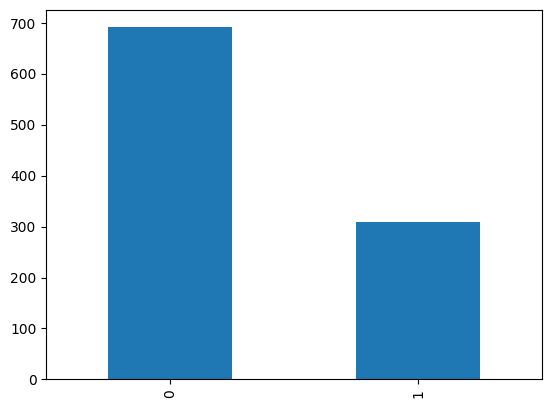

In [45]:
df.Outcome.value_counts().plot(kind='bar')

In [46]:
X = df.drop(['Outcome'], axis=1)
y = df.Outcome

In [47]:
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)
X_scaled = X

In [52]:
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.25, random_state=42)

In [53]:
lr = LogisticRegression()
model = lr.fit(X_train, y_train)

In [54]:
y_pred = model.predict(X_test)

In [55]:
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy: .2f}")

Accuracy:  0.65


In [56]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.65      1.00      0.79       163
           1       0.00      0.00      0.00        87

    accuracy                           0.65       250
   macro avg       0.33      0.50      0.39       250
weighted avg       0.43      0.65      0.51       250



c:\users\administrator\appdata\local\programs\python\python37\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\users\administrator\appdata\local\programs\python\python37\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\users\administrator\appdata\local\programs\python\python37\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.